In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
coefficients = {
    "diesel": (0.00580262, 0.00063457, 6.4831E-06, -1.446E-07, 2.3284E-09, -1.71E-11, 5.0932E-14),
    "petrol": (0.01185506, 0.00034041, 1.2578E-06, 1.0459E-07, -7.213E-10, 6.0958E-12, 0)
}

multiplicator = {
    "Car": 1, "Motorcycle": .7, "Bus": 2.5, "Truck": 3
}

def calculate_pollution(speed, vehicle_type, fuel):
    if speed <= 1:
        return 0
    a, b, c, d, e, f, g = coefficients[fuel]
    numerator = a + b*speed + c*speed**2 + d*speed**3 + e*speed**4 + f*speed**5 + g*speed**6
    return (numerator / speed) * multiplicator[vehicle_type]

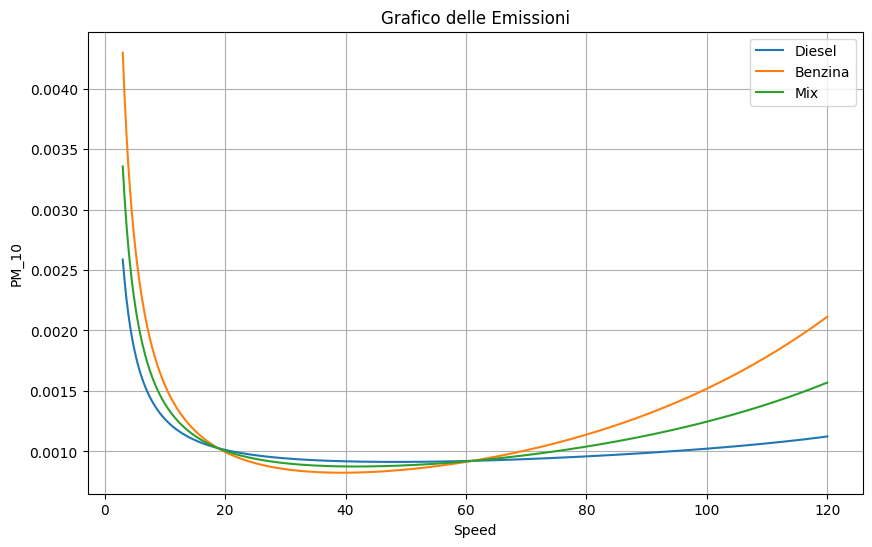

In [3]:
x = np.arange(3.0, 120.1, 0.1)


# Calcola i valori delle funzioni per ogni valore di x
y1 = [calculate_pollution(x_i, "Car", "diesel") for x_i in x]
y2 = [calculate_pollution(x_i, "Car", "petrol") for x_i in x]

efs = [0.55*d + 0.45*b for d, b in zip(y1, y2)]

# Traccia il grafico
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Diesel')
plt.plot(x, y2, label='Benzina')
plt.plot(x, efs, label='Mix')
plt.xlabel('Speed')
plt.ylabel('PM_10')
plt.title('Grafico delle Emissioni')
plt.legend()
plt.grid(True)
plt.show()